# Hometask 10

## Part 1

As a homework assignment, you are asked to create a neural network using Keras mechanisms that will classify products from the `fasion_mnist` dataset.

Unlike the previous assignment, you are asked to create a convolutional neural network. Choose a network architecture and train it on the data from the fasion_mnist dataset. Try to achieve the highest possible classification accuracy by manipulating the network parameters. Compare the accuracy of the resulting convolutional network with the accuracy of the multilayer network from the previous task. Draw conclusions.

In [1]:
# import libraries
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

### Data preparation

Download the dataset from its original source by running the cell below.

In [2]:
# Load the data
(training_images, training_labels), (validation_images, validation_labels) = fashion_mnist.load_data()

In [3]:
print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (60000, 28, 28) and dtype: uint8
Training labels has shape: (60000,) and dtype: uint8
Validation images has shape: (10000, 28, 28) and dtype: uint8
Validation labels has shape: (10000,) and dtype: uint8


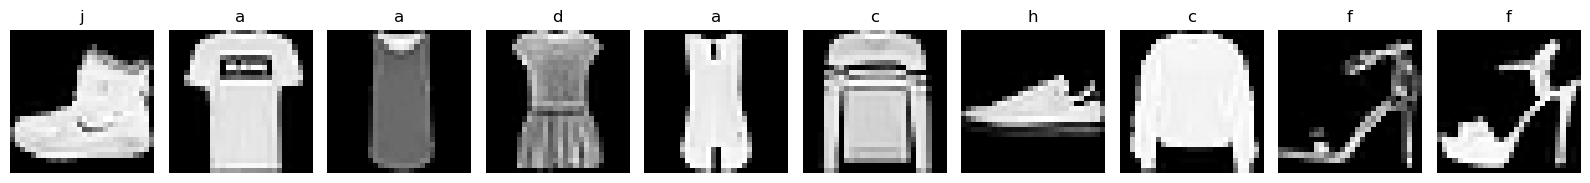

In [4]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
    fig, axes = plt.subplots(1, 10, figsize=(16, 15))
    axes = axes.flatten()
    letters = list(string.ascii_lowercase)

    for k in range(10):
        img = training_images[k]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img, cmap="Greys_r")
        ax.set_title(f"{letters[int(training_labels[k])]}")
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

plot_categories(training_images, training_labels)

### Creating the generators for the CNN

In [5]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):

    # Add another dimension to the data
    # So, for example, if array is (10000, 28, 28)
    # need to make it (10000, 28, 28, 1)
    training_images = np.expand_dims(training_images, axis=3)
    validation_images = np.expand_dims(validation_images, axis=3)

    # Instantiate the ImageDataGenerator class
    # Normalize pixel values
    # and set arguments to augment the images (if desired)
    train_datagen = ImageDataGenerator(rescale=1./255.,
                                       rotation_range=40,
                                       width_shift_range=.2,
                                       height_shift_range=.2,
                                       shear_range=.2,
                                       zoom_range=.2,
                                       fill_mode='nearest',
                                       horizontal_flip=True)


    # Pass in the appropriate arguments to the flow method
    train_generator = train_datagen.flow(x=training_images,
                                         y=training_labels,
                                         batch_size=32)


    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    # Remember that validation data should not be augmented
    validation_datagen = ImageDataGenerator(rescale=1./255.,)

    # Pass in the appropriate arguments to the flow method
    validation_generator = validation_datagen.flow(x=validation_images,
                                                   y=validation_labels,
                                                   batch_size=32)

    return train_generator, validation_generator

In [6]:
# Test generators
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (60000, 28, 28, 1)
Labels of training generator have shape: (60000,)
Images of validation generator have shape: (10000, 28, 28, 1)
Labels of validation generator have shape: (10000,)


## Coding the CNN

In [7]:
def create_model():

    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (5, 5), padding="same", activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (5, 5), padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (5, 5), padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])


    model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [8]:
# Save model
model = create_model()

# Train model
history = model.fit(train_generator,
                    epochs=8,
                    batch_size=128,
                    validation_data=validation_generator)

Epoch 1/8


2023-08-21 21:08:05.118917: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1875/1875 [==============================] - 217s 115ms/step - loss: 0.8940 - accuracy: 0.6626 - val_loss: 0.5740 - val_accuracy: 0.7768
Epoch 2/8
1875/1875 [==============================] - 200s 106ms/step - loss: 0.6331 - accuracy: 0.7573 - val_loss: 0.4680 - val_accuracy: 0.8189
Epoch 3/8
1875/1875 [==============================] - 201s 107ms/step - loss: 0.5630 - accuracy: 0.7900 - val_loss: 0.4749 - val_accuracy: 0.8222
Epoch 4/8
1875/1875 [==============================] - 200s 107ms/step - loss: 0.5163 - accuracy: 0.8062 - val_loss: 0.4172 - val_accuracy: 0.8413
Epoch 5/8
1875/1875 [==============================] - 199s 106ms/step - loss: 0.4951 - accuracy: 0.8130 - val_loss: 0.4174 - val_accuracy: 0.8432
Epoch 6/8
1875/1875 [==============================] - 197s 105ms/step - loss: 0.4770 - accuracy: 0.8220 - val_loss: 0.4122 - val_accuracy: 0.8473
Epoch 7/8
1875/1875 [==============================] - 201s 107ms/step - loss: 0.4626 - accuracy: 0.8263 - val_loss: 0.3719 - va

Now take a look at training history:

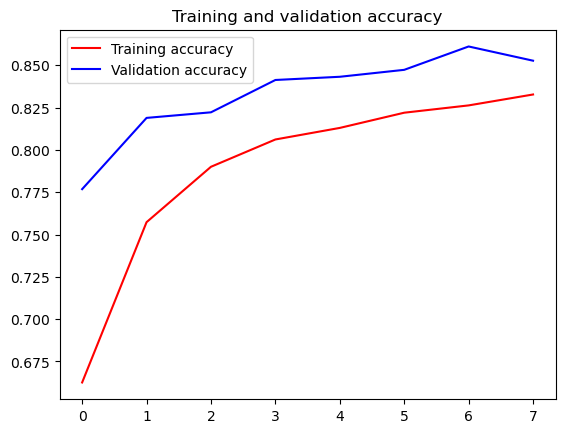

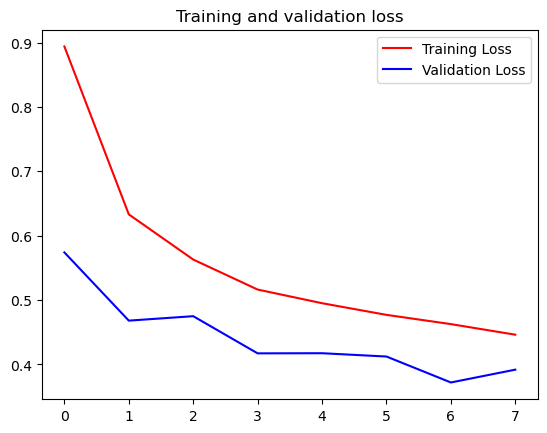

In [9]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
results = model.evaluate(validation_generator,verbose=1)
print(results)

313/313 [==============================] - 8s 24ms/step - loss: 0.3919 - accuracy: 0.8527
[0.3918517231941223, 0.8526999950408936]


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         409728    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

313/313 [==============================] - 9s 27ms/step


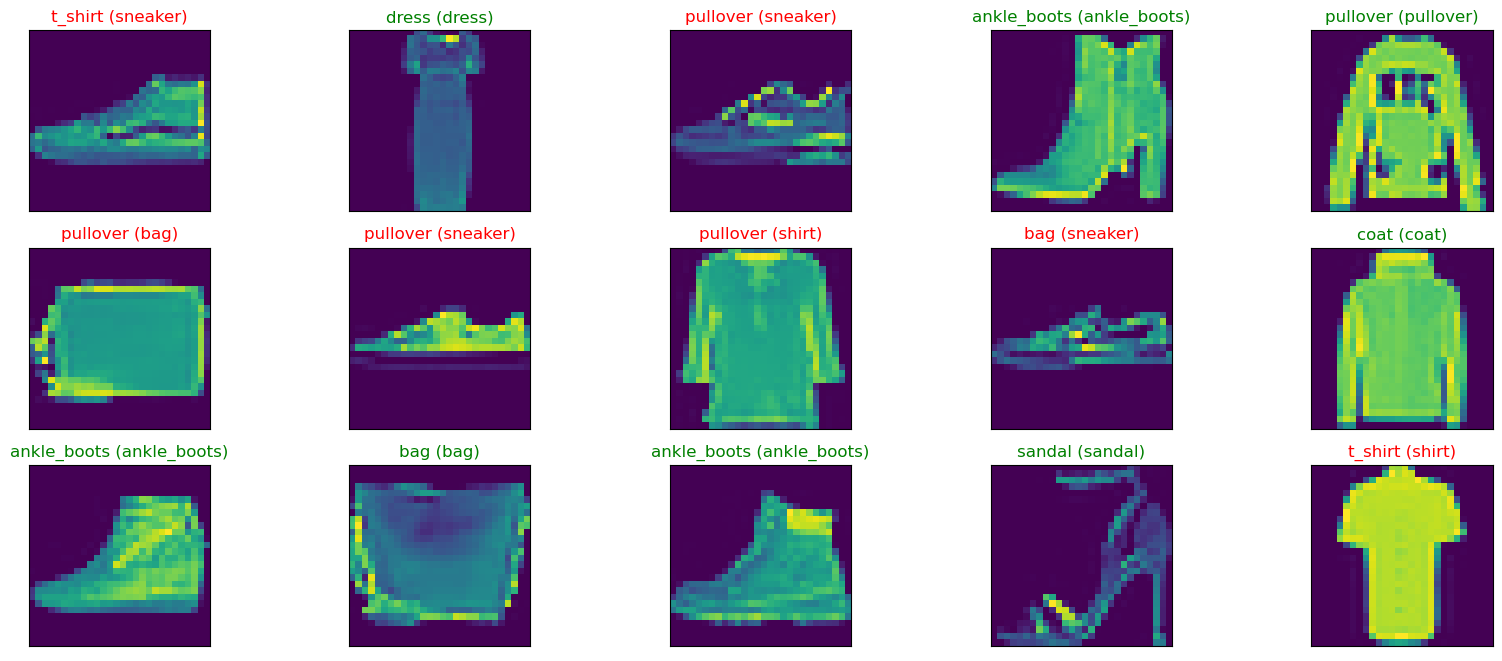

In [12]:
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
                        'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(validation_images)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(validation_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(validation_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = validation_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## Part 2
In this part, we will work with the `fasion_mnist` dataset again.

Unlike the previous assignment, you will be asked to create a convolutional neural network using VGG16 as a convolutional basis.

Train the resulting network on the data from the fasion_mnist dataset. Try to achieve the highest possible classification accuracy by manipulating the network parameters. During training, use the methods of retraining and feature extraction.

Compare the accuracy of the resulting convolutional network with the accuracy of the multilayer network from the previous task. Draw conclusions.

In [13]:
from keras.applications.vgg16 import VGG16
from keras.utils import to_categorical
from keras.optimizers import Adam

In [14]:
# Resize the images 32*32 as required by VGG16
training_images_vgg = tf.image.resize(np.array(training_images)[..., tf.newaxis], (32, 32))
training_images_vgg = np.repeat(training_images_vgg, 3, axis=-1)
validation_images_vgg = tf.image.resize(np.array(validation_images)[..., tf.newaxis], (32, 32))
validation_images_vgg = np.repeat(validation_images_vgg, 3, axis=-1)

# Change pixel values from (0, 255) to (0, 1)
training_images_vgg = np.array(training_images_vgg) / 255.0
validation_images_vgg = np.array(validation_images_vgg) / 255.0

In [15]:
training_images_vgg.shape, validation_images_vgg.shape

((60000, 32, 32, 3), (10000, 32, 32, 3))

In [16]:
# Converting Labels to one hot encoded format
num_classes = 10
training_labels_vgg = to_categorical(training_labels, num_classes)
validation_labels_vgg = to_categorical(validation_labels, num_classes)

In [17]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

model_vgg = Sequential()
model_vgg.add(conv_base)
model_vgg.add(Flatten())
model_vgg.add(Dense(256, activation="relu"))
model_vgg.add(Dense(10, activation="softmax"))

model_vgg.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history_vgg = model_vgg.fit(
    training_images_vgg, training_labels_vgg, epochs=8, verbose=1, batch_size=128, validation_split=0.2
)

Epoch 1/8
375/375 [==============================] - 215s 573ms/step - loss: 0.6237 - accuracy: 0.7877 - val_loss: 0.4755 - val_accuracy: 0.8273
Epoch 2/8
375/375 [==============================] - 211s 562ms/step - loss: 0.4361 - accuracy: 0.8433 - val_loss: 0.4448 - val_accuracy: 0.8378
Epoch 3/8
375/375 [==============================] - 217s 580ms/step - loss: 0.3973 - accuracy: 0.8550 - val_loss: 0.4135 - val_accuracy: 0.8512
Epoch 4/8
375/375 [==============================] - 217s 578ms/step - loss: 0.3752 - accuracy: 0.8623 - val_loss: 0.4044 - val_accuracy: 0.8516
Epoch 5/8
375/375 [==============================] - 229s 612ms/step - loss: 0.3565 - accuracy: 0.8695 - val_loss: 0.3890 - val_accuracy: 0.8592
Epoch 6/8
375/375 [==============================] - 215s 574ms/step - loss: 0.3426 - accuracy: 0.8747 - val_loss: 0.3823 - val_accuracy: 0.8604
Epoch 7/8
375/375 [==============================] - 206s 550ms/step - loss: 0.3295 - accuracy: 0.8794 - val_loss: 0.3779 - val_ac

In [18]:
total_params = model_vgg.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model_vgg.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 14,848,586 total parameters in this model.
There are 133,898 trainable parameters in this model.


In [19]:
results_vgg = model_vgg.evaluate(validation_images_vgg, validation_labels_vgg)
print(results_vgg)

313/313 [==============================] - 36s 116ms/step - loss: 0.3779 - accuracy: 0.8638
[0.37790560722351074, 0.8637999892234802]


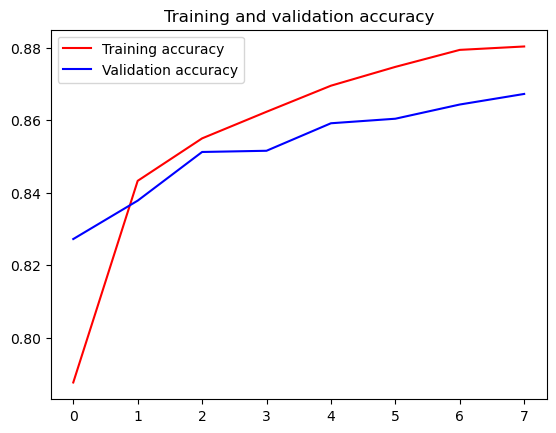

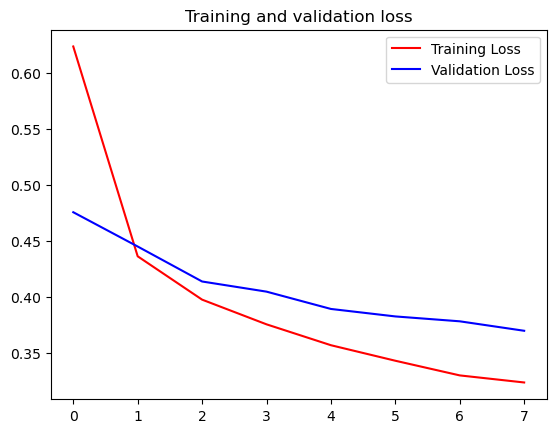

In [20]:
# Plot the chart for accuracy and loss on both training and validation
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']
loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [22]:
#let's do additional training of the last three layers
for i, layer in enumerate(model_vgg.layers):
    layer._name = 'layer_' + str(i)


conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


model_vgg = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])

In [23]:
model_vgg.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


history_vgg = model_vgg.fit(
    training_images_vgg, training_labels_vgg, epochs=3, verbose=1, batch_size=128, validation_split=0.2
)

Epoch 1/3
375/375 [==============================] - 413s 1s/step - loss: 0.4290 - accuracy: 0.8449 - val_loss: 0.3301 - val_accuracy: 0.8759
Epoch 2/3
375/375 [==============================] - 415s 1s/step - loss: 0.2850 - accuracy: 0.8949 - val_loss: 0.2926 - val_accuracy: 0.8917
Epoch 3/3
375/375 [==============================] - 412s 1s/step - loss: 0.2453 - accuracy: 0.9091 - val_loss: 0.2859 - val_accuracy: 0.8942


In [24]:
results_vgg2 = model_vgg.evaluate(validation_images_vgg, validation_labels_vgg)
print(results_vgg2)

313/313 [==============================] - 37s 120ms/step - loss: 0.2965 - accuracy: 0.8911
[0.29647552967071533, 0.8910999894142151]


#### Conclusion:
Comparing the conventional convolutional network and the convolutional network using VGG16 as a convolutional basis, we can see that the conventional network showed less accuracy with the same batch size and the same number of training epochs.